In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Dataset


In [4]:
path = '/content/drive/MyDrive/instacart/'
aisles = pd.read_csv(path + 'aisles.csv')
departments = pd.read_csv(path + 'departments.csv')
products = pd.read_csv(path + 'products.csv')
orders = pd.read_csv(path + 'orders.csv')
order_products__train = pd.read_csv(path + 'order_products__train.csv')
order_products__prior = pd.read_csv(path + 'order_products__prior.csv')
sample_submission = pd.read_csv(path + 'sample_submission.csv')

## Exploratory Data Analysis

In [5]:
#check aisle information
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
aisles.shape

(134, 2)

In [7]:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [8]:
#check departments information
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
departments.shape

(21, 2)

In [10]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [11]:
#check products information
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
products.shape

(49688, 4)

In [13]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [14]:
#check orders information
#There has the days_since_prior_order = NAN and the order_number so this is the first order
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [15]:
orders.shape

(3421083, 7)

In [16]:
#This is all the users' first order
orders.loc[orders.days_since_prior_order.isnull()].head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
50,2086598,6,prior,1,5,18,NaN
54,2565571,7,prior,1,3,9,NaN
75,600894,8,prior,1,6,0,NaN
79,280530,9,prior,1,1,17,NaN
83,1224907,10,prior,1,2,14,NaN


In [17]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [18]:
#order per day/week and hour/ day 
orders[['order_dow','order_hour_of_day']].describe()

,order_dow,order_hour_of_day
count,3.421083e+06,3.421083e+06
mean,2.776219e+00,1.345202e+01
std,2.046829e+00,4.226088e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01
50%,3.000000e+00,1.300000e+01
75%,5.000000e+00,1.600000e+01
max,6.000000e+00,2.300000e+01


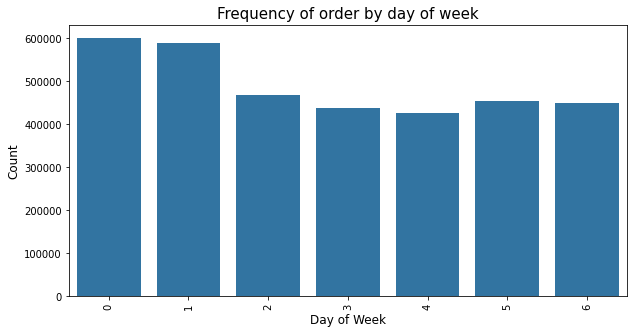

In [19]:
color = sns.color_palette()
plt.figure(figsize=(10,5))
sns.countplot(x='order_dow',data=orders,color =color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by day of week",fontsize=15)
#Sunday is the most orders date
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


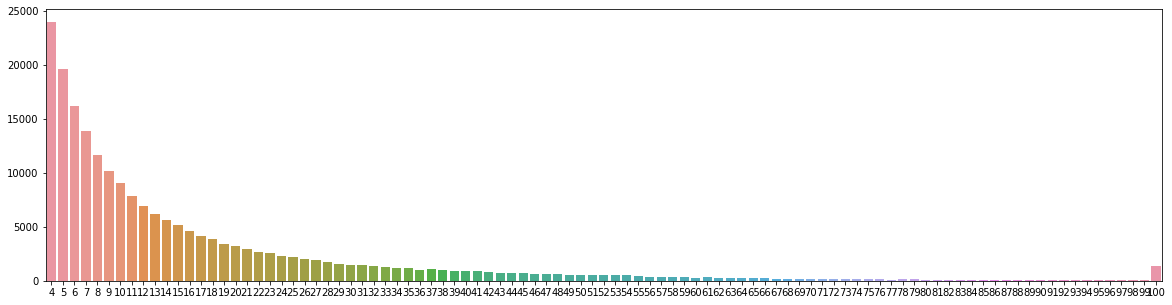

In [20]:
order_num_info=orders.groupby("user_id")["order_number"].agg(np.max).reset_index()
order_num_info_data=order_num_info.order_number.value_counts()
plt.figure(figsize=(20,5))
#The minium items in per order is 4 and the maxium items is 100
sns.barplot(order_num_info_data.index,order_num_info_data.values)
plt.show()

In [21]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

<BarContainer object of 3 artists>

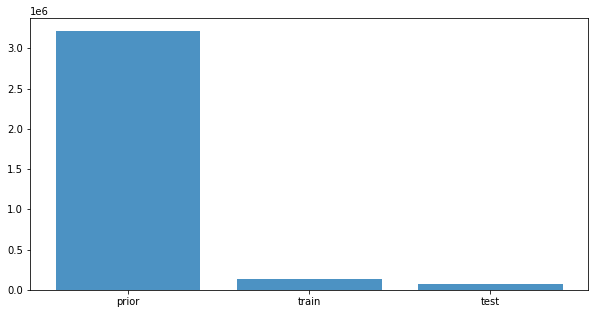

In [22]:
color = sns.color_palette()
type(orders['eval_set'].value_counts())#series
eval_set_info=orders['eval_set'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(eval_set_info.index,eval_set_info.values,color=color[0],alpha=0.8)

In [23]:
orders['order_number_max'] = orders.groupby('user_id')['order_number'].transform('max').values
orders.loc[orders.order_number!=orders.order_number_max,'eval_set'].value_counts()

prior    3214874
Name: eval_set, dtype: int64

In [24]:
orders.loc[orders.order_number==orders.order_number_max,'eval_set'].value_counts()

train    131209
test      75000
Name: eval_set, dtype: int64

### order_products__prior.csv


In [25]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [26]:
order_products__prior.shape

(32434489, 4)

In [27]:
order_products__prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [28]:
#reordered product is 59%
order_products__prior['reordered'].mean()

0.5896974667922161

In [29]:
order_products__prior['add_to_cart_order'].value_counts()

1      3214874
2      3058126
3      2871133
4      2664106
5      2442025
        ...   
144          1
140          1
139          1
138          1
145          1
Name: add_to_cart_order, Length: 145, dtype: int64

In [30]:
tmp = pd.DataFrame(order_products__prior['add_to_cart_order'].value_counts().sort_index())
tmp.head()

,add_to_cart_order
1,3214874
2,3058126
3,2871133
4,2664106
5,2442025


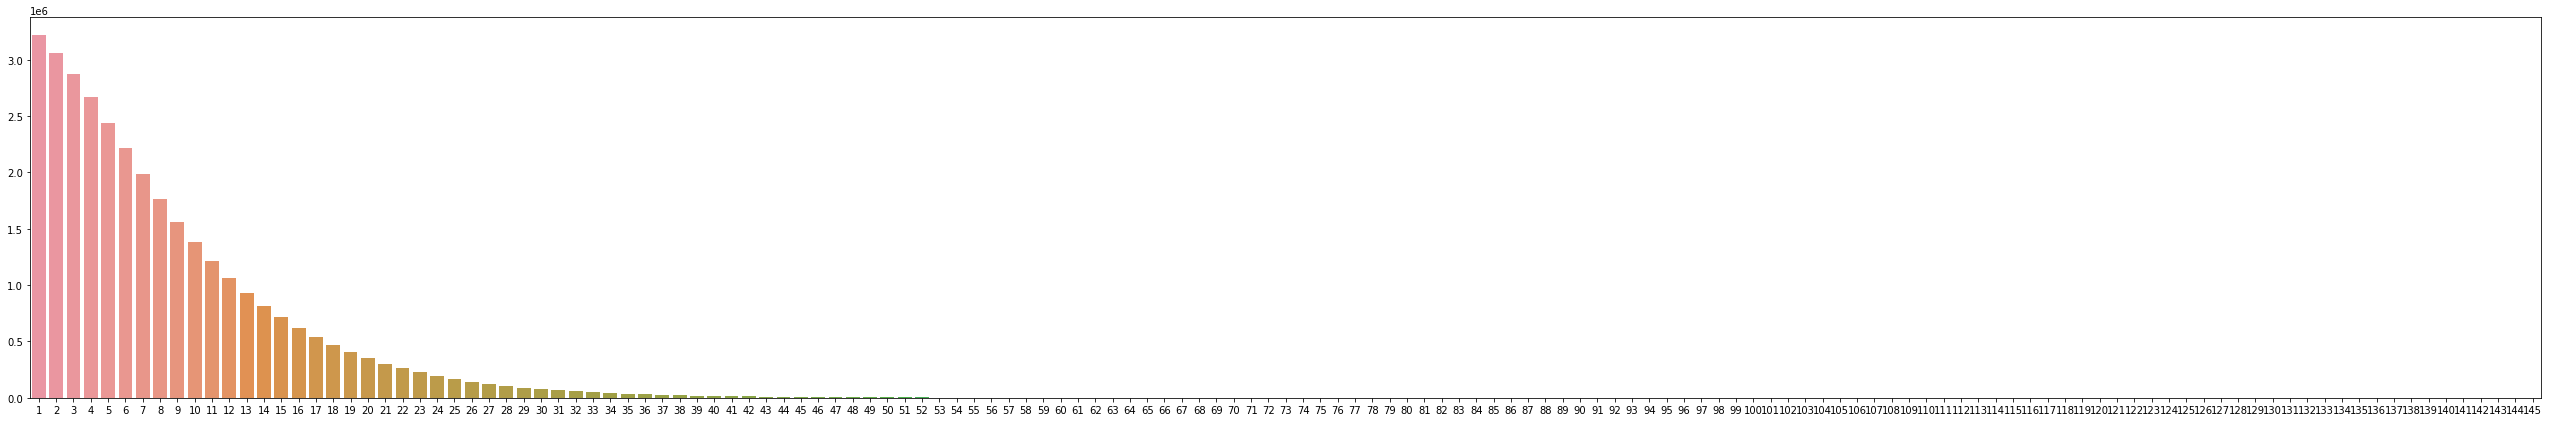

In [31]:
#draw
tmp = pd.DataFrame(order_products__prior['add_to_cart_order'].value_counts().sort_index())
plt.figure(figsize=(45,7))
sns.barplot(x = tmp.index.values, y =tmp.values[:,0])

### order_products__train.csv



In [32]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [33]:
order_products__train.shape

(1384617, 4)

In [34]:
order_products__train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

In [35]:
#There are 60% products has been reordered in the order_products__train
order_products__train['reordered'].mean()

0.5985944127509629

In [36]:
tmp = pd.DataFrame(order_products__prior['add_to_cart_order'].value_counts().sort_index())
tmp.head()

,add_to_cart_order
1,3214874
2,3058126
3,2871133
4,2664106
5,2442025


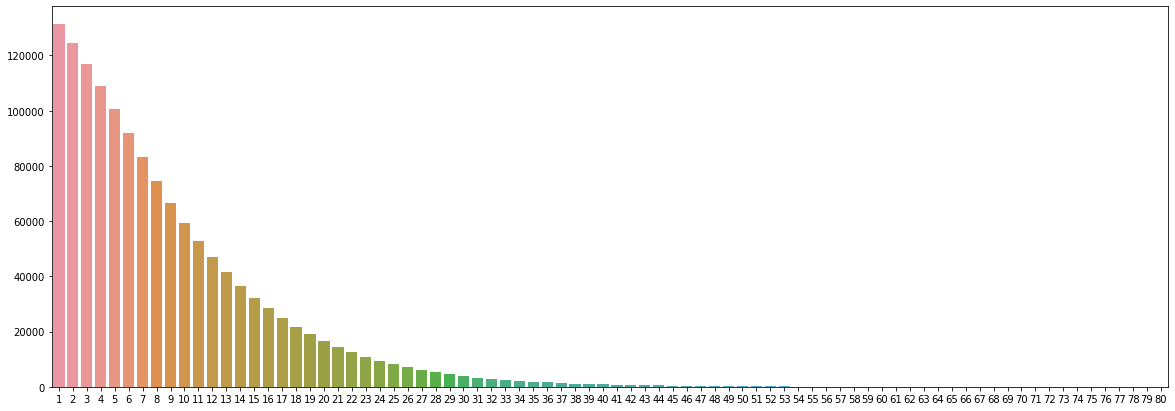

In [37]:
tmp=pd.DataFrame(order_products__train['add_to_cart_order'].value_counts().sort_index())
plt.figure(figsize=(20,7))
sns.barplot(x=tmp.index.values,y=tmp.values[:,0])




## Baseline



In [38]:
#delete the coloums added before 
import gc
del orders['order_number_max']
gc.collect()

52

In [39]:
#splite the dataset to three eval_set
orders_prior_data = orders.loc[orders.eval_set == 'prior']
orders_train_data = orders.loc[orders.eval_set == 'train'] 
orders_test_data  = orders.loc[orders.eval_set == 'test' ] 

#### Get user_X_product
To build the "Label"

In [40]:
priors = order_products__prior.merge(orders_prior_data, on =['order_id'], how='left')
trains = order_products__train.merge(orders_train_data, on =['order_id'], how='left')

In [41]:
#I take the combination of user_ID and product_ID in priors_dataset as my total candidate set
user_product = priors[['user_id','product_id']].copy()

In [42]:
user_product.shape

(32434489, 2)

In [43]:
user_product['user_X_product'] = user_product['user_id'].astype(str) + '_' + user_product['product_id'].astype(str)
train_user_X_product = trains['user_id'].astype(str) + '_' + trains['product_id'].astype(str) 

In [44]:
user_product = user_product.drop_duplicates(subset=['user_X_product'], keep = 'last')

In [45]:
user_product.shape

(13307953, 3)

#### Train dataset 


In [80]:
test_user = orders_test_data['user_id']
train_user = orders_train_data['user_id']

In [81]:
user_product['label'] = 0
#The latest users data as training data set
train_data = user_product.loc[user_product.user_id.isin(train_user)]
#the label of user_id & product_ID that appears in the training set is set to 1,
# which means that the user purchased the product again later, and the rest of the product is set to 0, 
#which means that the user did not purchase the product again later
train_data.loc[train_data.user_X_product.isin(train_user_X_product), 'label'] = 1 
train_data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,user_id,product_id,user_X_product,label
2,202279,9327,202279_9327,0
51,156122,47209,156122_47209,0
52,156122,46522,156122_46522,0
53,156122,38693,156122_38693,0
54,156122,48825,156122_48825,0
...,...,...,...,...
32434474,175185,16797,175185_16797,0
32434475,175185,43352,175185_43352,0
32434476,175185,32700,175185_32700,0
32434477,175185,12023,175185_12023,0


In [82]:
train_data = train_data.merge(orders_train_data,on ='user_id', how='left')
train_data.head()

,user_id,product_id,user_X_product,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,202279,9327,202279_9327,0,1050357,train,9,1,14,30.0
1,156122,47209,156122_47209,0,1277092,train,53,1,11,5.0
2,156122,46522,156122_46522,0,1277092,train,53,1,11,5.0
3,156122,38693,156122_38693,0,1277092,train,53,1,11,5.0
4,156122,48825,156122_48825,0,1277092,train,53,1,11,5.0


#### Test dataset



In [83]:
test_data  = user_product.loc[user_product.user_id.isin(test_user)]

In [84]:
test_data = test_data.merge(orders_test_data,on ='user_id', how='left')
test_data.head()

,user_id,product_id,user_X_product,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,45082,17330,45082_17330,0,65432,test,11,4,12,15.0
1,45082,27407,45082_27407,0,65432,test,11,4,12,15.0
2,45082,35419,45082_35419,0,65432,test,11,4,12,15.0
3,45082,196,45082_196,0,65432,test,11,4,12,15.0
4,45082,44635,45082_44635,0,65432,test,11,4,12,15.0


In [85]:
#delete the user_x_product from test_data and train_data
del test_data['user_X_product']
del train_data['user_X_product']
gc.collect()

341



## Merge train _data and test_data with product_id


In [86]:
train_data =  train_data.merge(products, on='product_id', how= 'left')
test_data  =  test_data.merge(products, on='product_id', how= 'left')

In [87]:
train_data.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,202279,9327,0,1050357,train,9,1,14,30.0,Garlic Powder,104,13
1,156122,47209,0,1277092,train,53,1,11,5.0,Organic Hass Avocado,24,4
2,156122,46522,0,1277092,train,53,1,11,5.0,Spaghetti Pasta,131,9
3,156122,38693,0,1277092,train,53,1,11,5.0,Meyer Lemon,24,4
4,156122,48825,0,1277092,train,53,1,11,5.0,Bag of Organic Lemons,24,4


In [88]:
test_data.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,45082,17330,0,65432,test,11,4,12,15.0,Light,27,5
1,45082,27407,0,65432,test,11,4,12,15.0,Chunky Salsa Medium,51,13
2,45082,35419,0,65432,test,11,4,12,15.0,"Handmade Vodka From Austin, Texas",124,5
3,45082,196,0,65432,test,11,4,12,15.0,Soda,77,7
4,45082,44635,0,65432,test,11,4,12,15.0,Salsa Con Queso Medium Dip,51,13


In [91]:
import pickle
subtest_Lightgbm =test_data.sample(frac=0.01)
subtest_Lightgbm.to_pickle("subtest_Lightgbm")


## Simple Feature Analysis. 


In [55]:
#Seven features
feature_cols = ['order_number','order_dow','order_hour_of_day','days_since_prior_order','product_id','aisle_id','department_id']
label_cols = 'label'

## Model Train and Validation


In [56]:
def validation_sample(order_ids, frac = 0.2):
    import random
    sample_number = int(frac * len(order_ids))
    sample_val_order = random.sample( order_ids , sample_number) 
    sample_train_order = list(set(order_ids) - set(sample_val_order))
    return sample_train_order,sample_val_order

In [57]:
sample_train_order,sample_val_order = validation_sample(list(train_data['order_id'].unique()))

In [58]:
train = train_data.loc[train_data.order_id.isin(sample_train_order)]
val   = train_data.loc[train_data.order_id.isin(sample_val_order)]

In [59]:
from sklearn.metrics import f1_score
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat >= 0.2) #0.2 is defult number
    return 'f1', f1_score(y_true, y_hat), True

In [60]:
import lightgbm as lgb
d_train = lgb.Dataset(train[feature_cols], label=train[label_cols].values)   
d_val   = lgb.Dataset(val[feature_cols], label=val[label_cols].values)    

In [61]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 2 ** 5,
    'max_depth': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5
}
ROUNDS = 100 
print('light GBM train :')
bst = lgb.train(params, d_train, ROUNDS, valid_sets=[d_train,d_val], feval =lgb_f1_score,verbose_eval=10)
del d_train 

light GBM train :
[10]	training's binary_logloss: 0.30842	training's f1: 0.0549278	valid_1's binary_logloss: 0.306996	valid_1's f1: 0.0557277
[20]	training's binary_logloss: 0.305483	training's f1: 0.102616	valid_1's binary_logloss: 0.304074	valid_1's f1: 0.101879
[30]	training's binary_logloss: 0.304381	training's f1: 0.131984	valid_1's binary_logloss: 0.302991	valid_1's f1: 0.130655
[40]	training's binary_logloss: 0.303501	training's f1: 0.150146	valid_1's binary_logloss: 0.30215	valid_1's f1: 0.148476
[50]	training's binary_logloss: 0.302868	training's f1: 0.163315	valid_1's binary_logloss: 0.301509	valid_1's f1: 0.161917
[60]	training's binary_logloss: 0.302509	training's f1: 0.169049	valid_1's binary_logloss: 0.301179	valid_1's f1: 0.16795
[70]	training's binary_logloss: 0.302206	training's f1: 0.17329	valid_1's binary_logloss: 0.300898	valid_1's f1: 0.17219
[80]	training's binary_logloss: 0.30191	training's f1: 0.177624	valid_1's binary_logloss: 0.300626	valid_1's f1: 0.176683
[9

<Figure size 864x432 with 0 Axes>

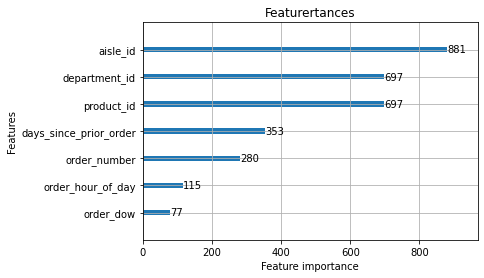

In [62]:
plt.figure(figsize=(12,6))
lgb.plot_importance(bst, max_num_features=7)
plt.title("Featurertances")
plt.show()


###  Training model -Train Dataset

In [63]:
import lightgbm as lgb
d_train = lgb.Dataset(train_data[feature_cols], label=train_data[label_cols].values)    

In [64]:
params = {
    'task': 'train',#training model, default mode
    'boosting_type': 'gbdt',#Gradient Boosting Decision Tree
    'objective': 'binary',#binary log loss classification application
    'metric': {'binary_logloss'},#binary classification
    'num_leaves': 255,# total number in the tree
    'max_depth': 10, #should be less then 2^5
    'bagging_freq': 5 #every 5 round do bagging once
}
ROUNDS = 150 
print('light GBM train ')
bst = lgb.train(params, d_train, ROUNDS, valid_sets=[d_train], feval =lgb_f1_score,verbose_eval=10)

light GBM train 
[10]	training's binary_logloss: 0.304904	training's f1: 0.102986
[20]	training's binary_logloss: 0.302141	training's f1: 0.154203
[30]	training's binary_logloss: 0.301065	training's f1: 0.176591
[40]	training's binary_logloss: 0.300333	training's f1: 0.188039
[50]	training's binary_logloss: 0.299631	training's f1: 0.195529
[60]	training's binary_logloss: 0.299059	training's f1: 0.200758
[70]	training's binary_logloss: 0.298562	training's f1: 0.205079
[80]	training's binary_logloss: 0.298237	training's f1: 0.207393
[90]	training's binary_logloss: 0.297857	training's f1: 0.210424
[100]	training's binary_logloss: 0.297504	training's f1: 0.212631
[110]	training's binary_logloss: 0.2972	training's f1: 0.214853
[120]	training's binary_logloss: 0.296907	training's f1: 0.2165
[130]	training's binary_logloss: 0.296638	training's f1: 0.218169
[140]	training's binary_logloss: 0.29645	training's f1: 0.219078
[150]	training's binary_logloss: 0.296189	training's f1: 0.220658


### Prediction - Test Dataset

In [65]:
pred = bst.predict(test_data[feature_cols])
test_data['pred'] = pred

In [66]:
test_data['product_id'] = test_data['product_id'].astype(str)

In [67]:
test_data.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,pred
0,45082,17330,0,65432,test,11,4,12,15.0,Light,27,5,0.114586
1,45082,27407,0,65432,test,11,4,12,15.0,Chunky Salsa Medium,51,13,0.092346
2,45082,35419,0,65432,test,11,4,12,15.0,"Handmade Vodka From Austin, Texas",124,5,0.089981
3,45082,196,0,65432,test,11,4,12,15.0,Soda,77,7,0.310979
4,45082,44635,0,65432,test,11,4,12,15.0,Salsa Con Queso Medium Dip,51,13,0.059729


### Transfer to csv file for submition 


In [72]:
order_product = {}
for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
    if order_id not in order_product:
        order_product[order_id] = ''
    if val >= 0.2:
        order_product[order_id] = str(product_id ) if order_product[order_id] == '' else order_product[order_id]+ ' ' + str(product_id )
sub = pd.DataFrame.from_dict(order_product, orient='index')
sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.loc[sub.products =='', 'products'] = 'None'
sub.to_csv('baseline.csv',index = None)

#### Threshold = 0.12

In [76]:
order_product = {}
for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
    if order_id not in order_product:
        order_product[order_id] = ''
    if val >= 0.12:
        order_product[order_id] = str(product_id ) if order_product[order_id] == '' else order_product[order_id]+ ' ' + str(product_id )
sub = pd.DataFrame.from_dict(order_product, orient='index')
sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.loc[sub.products =='', 'products'] = 'None'
sub.to_csv('baseline_0.12.csv',index = None)

#### Threshold = 0.8


In [75]:
order_product = {}
for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
    if order_id not in order_product:
        order_product[order_id] = ''
    if val >= 0.8:
        order_product[order_id] = str(product_id ) if order_product[order_id] == '' else order_product[order_id]+ ' ' + str(product_id )
sub = pd.DataFrame.from_dict(order_product, orient='index')
sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.loc[sub.products =='', 'products'] = 'None'
sub.to_csv('baseline_0.8.csv',index = None)


In [78]:
import pickle
filename = 'Lightgbm.sav'
pickle.dump(bst, open(filename, 'wb'))